# ESA Sentinel-5P L3 (GeoTIFF)

Sentinel-5P L3 (GeoTIFF) provides clipped Level-3 (daily composites) images as Cloud Optimized GeoTIFFs (COGs) from the Sentinel-5P mission. Sentinel-5P is a polar orbiting satellite that completes 14 orbits of the Earth a day. It carries the TROPOspheric Monitoring Instrument (TROPOMI) which is a spectrometer that senses ultraviolet (UV), visible (VIS), near (NIR) and short wave infrared (SWIR) to monitor ozone, methane, formaldehyde, aerosol, carbon monoxide, nitrogen dioxide and sulphur dioxide in the atmosphere.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/70919851-c563-4e5e-9393-029cf10377c7) and [Documentation](https://docs.up42.com/up42-blocks/data/esa-s5p-l3-gtiff.html).

In [1]:
import geojson
import up42
import geopandas as gpd

In [2]:
up42.authenticate(project_id="12345", project_api_key="12345")
project = up42.initialize_project()

# Construct workflow
workflow = project.create_workflow(name="esa-s5p-workflow", use_existing=True)

2021-03-15 11:36:54,716 - Authentication with UP42 successful!
2021-03-15 11:36:55,311 - Initialized Project(name: Blocks, project_id: 810e8039-cb5c-445b-b08d-53b0dde1bde0, description: , createdAt: 2020-07-13T14:32:49.406Z)
2021-03-15 11:36:55,312 - Getting existing workflows in project ...
2021-03-15 11:36:55,633 - Got 60 workflows for project 810e8039-cb5c-445b-b08d-53b0dde1bde0.
100%|██████████| 60/60 [00:20<00:00,  2.94it/s]
2021-03-15 11:37:16,034 - Using existing workflow: esa-s5p-workflow - 1ecf3424-4dae-44a2-ac6b-79311dbc8089


In [3]:
input_tasks = ["esa-s5p-l3-gtiff"]
workflow.add_workflow_tasks(input_tasks)

2021-03-15 11:37:19,104 - Added tasks to workflow: [{'name': 'esa-s5p-l3-gtiff:1', 'parentName': None, 'blockId': '70919851-c563-4e5e-9393-029cf10377c7'}]


In [1]:
# Define the aoi 
barcelona_example_aoi = {"type":"Feature","properties":{}, 
      "geometry":{"type": "Polygon","coordinates": [
        [[2.109314,41.394249],
         [2.241211,41.391234],
         [2.241211,41.327326],
         [2.083707,41.326001],
         [2.109314,41.394249]]]}}
# other options include to define aoi up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.

In [5]:
# Get input parameters
workflow.get_parameters_info()

2021-03-15 11:37:19,464 - Got 1 tasks/blocks in workflow 1ecf3424-4dae-44a2-ac6b-79311dbc8089.


{'esa-s5p-l3-gtiff:1': {'bbox': {'type': 'array', 'default': None},
  'time': {'type': 'dateRange',
   'default': '2020-05-01T00:00:00+00:00/2021-12-31T23:59:59+00:00'},
  'layer': {'type': 'string'},
  'qa_mask': {'type': 'string', 'default': 'nomask'},
  'contains': {'type': 'geometry'},
  'intersects': {'type': 'geometry'},
  'geojson_url': {'type': 'string', 'default': None},
  'fail_on_missing': {'type': 'boolean', 'default': False}}}

In [6]:
# Define input parameters of the workflow to run it.
input_parameters = workflow.construct_parameters(geometry=barcelona_example_aoi, 
                                                 geometry_operation="intersects", 
                                                 start_date="2019-09-01",
                                                 end_date="2019-09-10")

In the above code cell, we created a basic input parameters. However, the block requires additional parameters as per workflow.get_parameters_info(). We will add those to our parameter configuration in the following steps:

In [7]:
data_block_additional_params = {"layer": "L3__CH4___",
                                "geojson_url": None,
                                "qa_mask": "nomask",}
# update input parameters with additional params
input_parameters['esa-s5p-l3-gtiff:1'] = {**input_parameters['esa-s5p-l3-gtiff:1'], **data_block_additional_params}

In [8]:
# check if everything is as expected
print(input_parameters)

{'esa-s5p-l3-gtiff:1': {'time': '2019-09-01T00:00:00Z/2019-09-10T23:59:59Z', 'qa_mask': 'nomask', 'fail_on_missing': False, 'intersects': {'type': 'Polygon', 'coordinates': (((2.109314, 41.394249), (2.241211, 41.391234), (2.241211, 41.327326), (2.083707, 41.326001), (2.109314, 41.394249)),)}, 'layer': 'L3__CH4___', 'geojson_url': None}}


In [9]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-15 11:37:24,722 - Estimated: 1-1 Credits, Duration: 0-0 min.


{'esa-s5p-l3-gtiff:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 890.336938,
    'max': 890.336938},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [10]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

job.download_results()

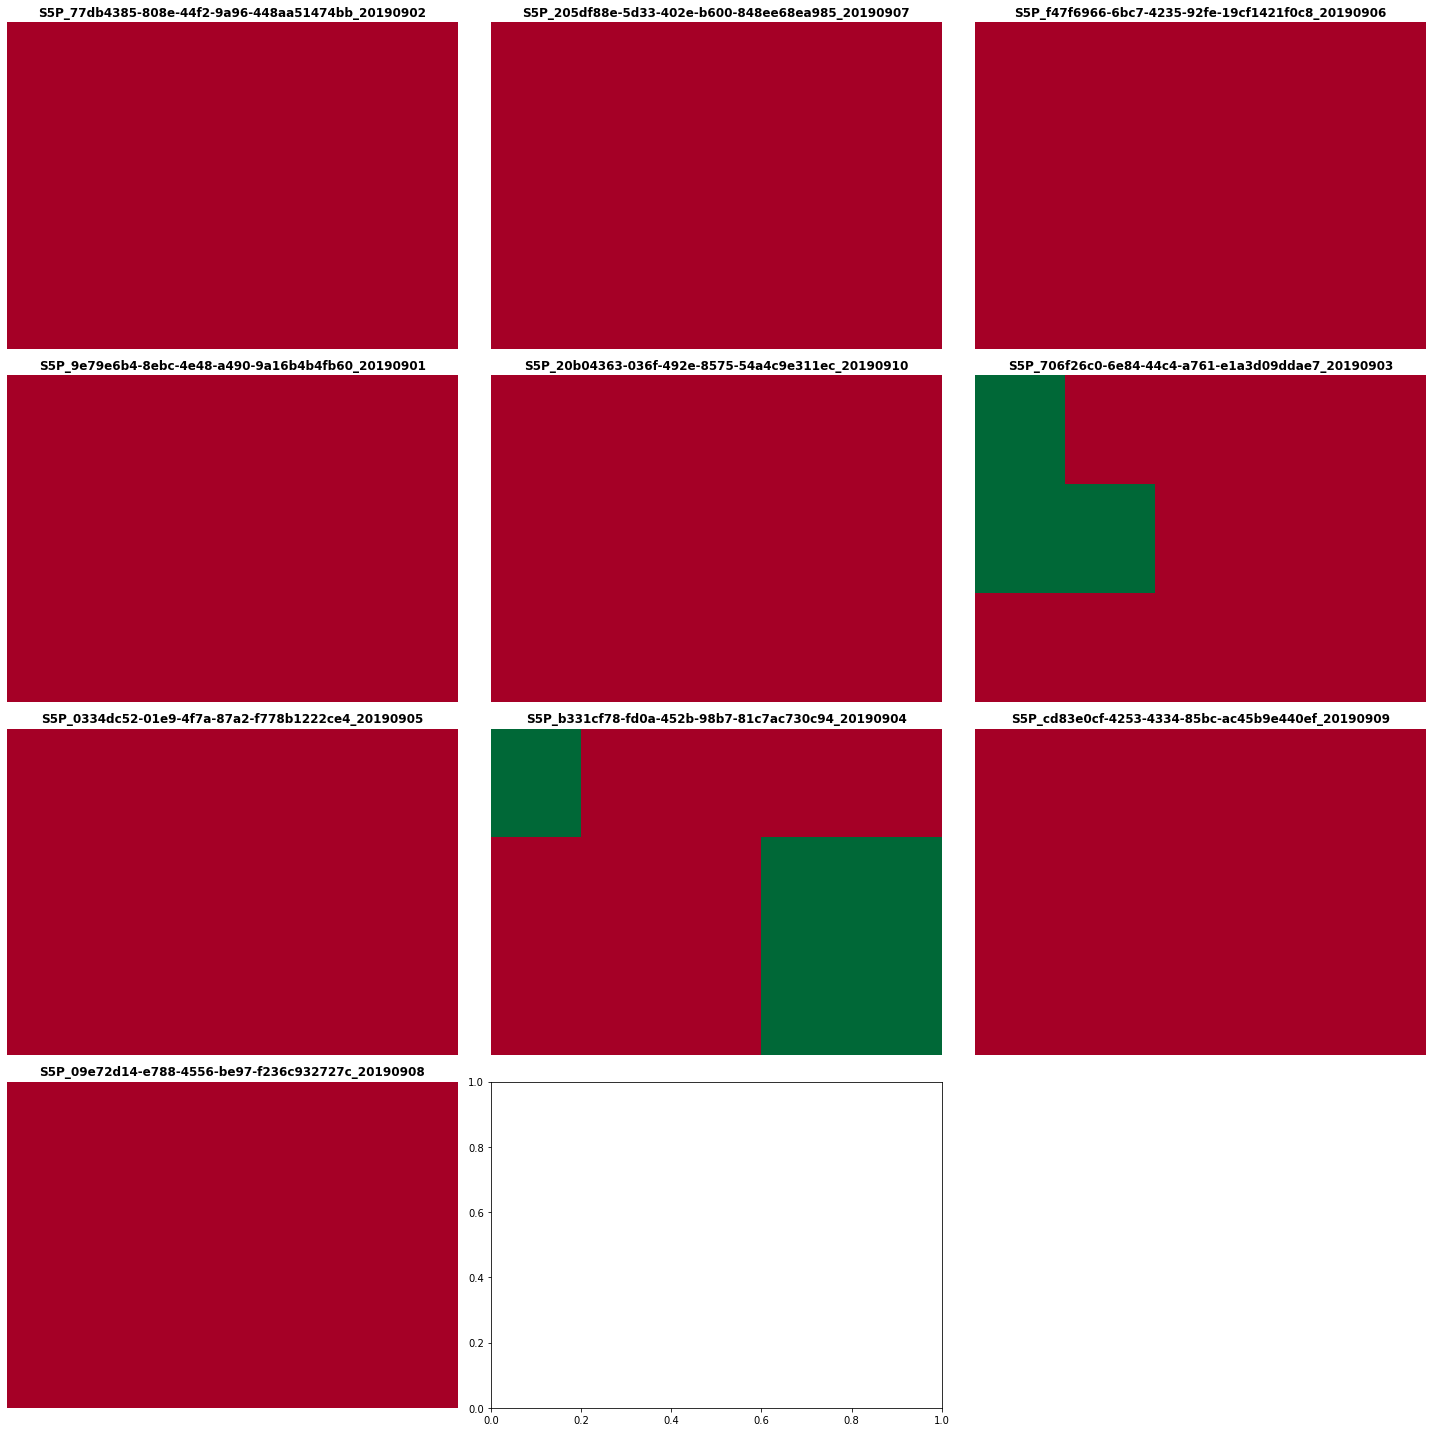

In [17]:
job.plot_results(figsize=(20,20), bands=[1], cmap="RdYlGn")